In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Correct for offgass system fraction

# Importing data

In [2]:
# Data on isotopes in primary circuit in normal operation
Iso = pd.read_excel(r'/Users/imemeulenbelt/Desktop/Data/Excel data/Fission products 2020 defect.xlsx')

# Setting Sample date time as index column
Iso['Date'] = pd.to_datetime(Iso['Date'], format='%d/%m/%Y')
Iso.set_index('Date', inplace=True)

# Defining necessary information of isotopes

In [4]:
# Other products
def Effective_lamb(t_half_p, t_half_d):
    Lamb_p = np.log(2)/(t_half_p * 24 * 3600) # In days
    Lamb_d = np.log(2)/(t_half_d * 24 * 3600) # In days
    return (Lamb_p * Lamb_d)/(Lamb_p + Lamb_d)

def Effective_diffusion_coeff(t_half_p, D_p, t_half_d, D_d):
    Weight = t_half_p+t_half_d
    D1 = t_half_p*D_p
    D2 = t_half_d*D_d
    return (D1+D2)/Weight



# Gaseous, Diffusion coeff extrapolated from https://www.engineeringtoolbox.com/diffusion-coefficients-d_1404.html
M_Kr85m,  Lamb_Kr85m,  D_water_Kr85m,  Y_Kr85m = 85,   0.41e-4,                          2.8E-9,         0.015
M_Kr87,   Lamb_Kr88,   D_water_Kr88,   Y_Kr88  = 88,   np.log(2)/(2.77*3600),            2.8E-9,         0.037 
M_Kr88,   Lamb_Kr87,   D_water_Kr87,   Y_Kr87  = 87,   1.5e-4,                           2.8E-9,         0.027 
M_Xe133,  Lamb_Xe133,  D_water_Xe133,  Y_Xe133 = 133,  Effective_lamb(20.8/24, 5.27),    2.2E-9,         0.065
M_Xe135,  Lamb_Xe135,  D_water_Xe135,  Y_Xe135 = 135,  Effective_lamb(6.68/24, 9.13/24), 2.2E-9,         0.062
M_Xe138,  Lamb_Xe138,  D_water_Xe138,  Y_Xe138 = 138,  np.log(2) / (14.08 * 60),         2.2E-9,         0.055 

    
# Volatile and daughters   Iodine is very soluble and very volatile in the fuel
M_Y91m,   Lamb_Y91m,   D_Water_Y91m,   Y_Y91m  = 91,   Effective_lamb(9.7/24,51/(60*24)),      Effective_diffusion_coeff(9.7/24, 1e-9,51/(60*24) , 1e-10),    0.024
M_Sr91,   Lamb_Sr91,   D_Water_Sr91,   Y_Sr91  = 91,   np.log(2)/(9.7*3600),                   6e-10,                                                          0.059
M_Sr92,   Lamb_Sr92,   D_Water_Sr92,   Y_Sr92  = 92,   np.log(2)/(2.7*3600),                   6e-10,                                                          0.061
M_Nb97,   Lamb_Nb97,   D_Water_Nb97,   Y_Nb97  = 97,   Effective_lamb(17/24, 72.1/(60*24)),    Effective_diffusion_coeff(17/24, 1e-9, 72.1/(60*24) , 1e-10),  0.062
M_Zr97,   Lamb_Zr97,   D_Water_Zr97,   Y_Zr97  = 97,   np.log(2)/(17*3600),                    8e-10,                                                         0.062
M_Tc99m,   Lamb_Tc99m,   D_Water_Tc99m,   Y_Tc99m  = 99,   Effective_lamb(17/24, 72.1/(60*24)),    Effective_diffusion_coeff(17/24, 6e-9, 72.1/(60*24) , 1e-10),  0.062
M_Ru103,  Lamb_Ru103,  D_Water_Ru103,  Y_Ru103 = 103,  np.log(2)/(41*24*3600),                 6e-10                                                       ,  0.029
M_Ru106,  Lamb_Ru106,  D_Water_Ru106,  Y_Ru106 = 106,  np.log(2)/(1*365*24*3600)             , 6e-10,                                                         0.0038                                                

M_I131,   Lamb_I131,   D_Water_I131,   Y_I131  = 131,  np.log(2)/(8.05*24*3600),               1.95e-9,                                                       0.029 # upper = 2.8, lower = 1https://jcsp.org.pk/PublishedVersion/a0722532-789a-420b-9a5c-e5c5843ec3ebManuscript%20no%204,%20Final%20Gally%20Proof%20of%2010402%20(Mahboob%20Mohammad).pdf
M_I132,   Lamb_I132,   D_Water_I132,   Y_I132  = 132,  np.log(2)/(2.4*60),                     1.95e-9,                                                       0.044
M_I133,   Lamb_I133,   D_Water_I133,   Y_I133  = 133,  np.log(2)/(30.8*3600),                  1.95e-9,                                                       0.065
M_I134,   Lamb_I134,   D_Water_I134,   Y_I134  = 134,  np.log(2)/(52.5*60),                    1.95e-9,                                                       0.076
M_I135,   Lamb_I135,   D_Water_I135,   Y_I135  = 135,  np.log(2)/(6.68*3600),                  1.95e-9,                                                       0.059
M_Cs138,  Lamb_Cs138,  D_Water_Cs138,  Y_Cs138 = 138,  Effective_lamb(17/(60*24), 32/(60*24)), 2.056e-9,                                                      0.058
M_Ba139,  Lamb_Ba139,  D_Water_Ba139,  Y_Ba139 = 139,  np.log(2)/(85*60),                      6e-10,                                                          0.06
#M_Ce139,  Lamb_Ce139,  D_Water_Ce139,  Y_Ce139 = 139, 
M_Ba140,  Lamb_Ba140,  D_Water_Ba140,  Y_Ba140 = 140,  np.log(2)/(12.8*24*3600),               6e-10,                                                          0.063
M_Ce141,  Lamb_Ce141,  D_Water_Ce141,  Y_Ce141 = 141,  Effective_lamb(3.7/(24), 32),           6e-10,                                                          0.06
M_Ce143,  Lamb_Ce143,  D_Water_Ce143,  Y_Ce143 = 143,  np.log(2)/(32*3600),                    6e-10,                                                          0.062

M_La140,  Lamb_eff_La140, D_water_La140 = 140, Effective_lamb(12.75, 1.68), 6.2e-10 #m2/s
M_Cs137,  Lamb_Cs137, D_clad_Cs137, D_water_Cs137 = 137, np.log(2)/(30*365*3600*24), 1e-20 , 2.056e-9#9e-10#6e-12 #2.056e-9#6e-12


isotopes = [
    {"M_Isotope": M_Kr85m, "Lamb": Lamb_Kr85m, "D_water": D_water_Kr85m, "Y": Y_Kr85m, "name": 'Kr85m'},
    {"M_Isotope": M_Kr87, "Lamb": Lamb_Kr87, "D_water": D_water_Kr87, "Y": Y_Kr87, "name": 'Kr87'},
    {"M_Isotope": M_Kr88, "Lamb": Lamb_Kr88, "D_water": D_water_Kr88, "Y": Y_Kr88, "name": 'Kr88'},
    {"M_Isotope": M_Xe138, "Lamb": Lamb_Xe138, "D_water": D_water_Xe138, "Y": Y_Xe138, "name": 'Xe138'},
    {"M_Isotope": M_Sr91, "Lamb": Lamb_Sr91, "D_water": D_Water_Sr91, "Y": Y_Sr91, "name": 'Sr91'},
    {"M_Isotope": M_Sr92, "Lamb": Lamb_Sr92, "D_water": D_Water_Sr92, "Y": Y_Sr92, "name": 'Sr92'},
    {"M_Isotope": M_Nb97, "Lamb": Lamb_Nb97, "D_water": D_Water_Nb97, "Y": Y_Nb97, "name": 'Nb97'},
    {"M_Isotope": M_Zr97, "Lamb": Lamb_Zr97, "D_water": D_Water_Zr97, "Y": Y_Zr97, "name": 'Zr97'},
    {"M_Isotope": M_Tc99m, "Lamb": Lamb_Tc99m, "D_water": D_Water_Tc99m, "Y": Y_Tc99m, "name": 'Tc99m'},
    {"M_Isotope": M_Ru103, "Lamb": Lamb_Ru103, "D_water": D_Water_Ru103, "Y": Y_Ru103, "name": 'Ru103'},
    {"M_Isotope": M_Ru106, "Lamb": Lamb_Ru106, "D_water": D_Water_Ru106, "Y": Y_Ru106, "name": 'Ru106'},
    {"M_Isotope": M_I131, "Lamb": Lamb_I131, "D_water": D_Water_I131, "Y": Y_I131, "name": 'I131'},
    {"M_Isotope": M_I132, "Lamb": Lamb_I132, "D_water": D_Water_I132, "Y": Y_I132, "name": 'I132'},
    {"M_Isotope": M_I133, "Lamb": Lamb_I133, "D_water": D_Water_I133, "Y": Y_I133, "name": 'I133'},
    {"M_Isotope": M_I134, "Lamb": Lamb_I134, "D_water": D_Water_I134, "Y": Y_I134, "name": 'I134'},
    {"M_Isotope": M_Xe133, "Lamb": Lamb_Xe133, "D_water": D_water_Xe133, "Y": Y_Xe133, "name": 'Xe133'},
    {"M_Isotope": M_I135, "Lamb": Lamb_I135, "D_water": D_Water_I135, "Y": Y_I135, "name": 'I135'},
    {"M_Isotope": M_Xe135, "Lamb": Lamb_Xe135, "D_water": D_water_Xe135, "Y": Y_Xe135, "name": 'Xe135'},
    {"M_Isotope": M_Cs138, "Lamb": Lamb_Cs138, "D_water": D_Water_Cs138, "Y": Y_Cs138, "name": 'Cs138'},
    {"M_Isotope": M_Ba139, "Lamb": Lamb_Ba139, "D_water": D_Water_Ba139, "Y": Y_Ba139, "name": 'Ba139'},
    {"M_Isotope": M_Ba140, "Lamb": Lamb_Ba140, "D_water": D_Water_Ba140, "Y": Y_Ba140, "name": 'Ba140'},
    {"M_Isotope": M_Ce141, "Lamb": Lamb_Ce141, "D_water": D_Water_Ce141, "Y": Y_Ce141, "name": 'Ce141'},
    {"M_Isotope": M_Ce143, "Lamb": Lamb_Ce143, "D_water": D_Water_Ce143, "Y": Y_Ce143, "name": 'Ce143'},
    {"M_Isotope": M_La140, "Lamb": Lamb_eff_La140, "D_water": D_water_La140, "Y": 0.063, "name": 'La-140'},
    {"M_Isotope": M_Cs137, "Lamb": Lamb_Cs137, "D_water": D_water_Cs137, "Y": 0.059, "name": 'Cs-137'},
]


## Subtracting baseline values and correcting for off gassing

In [5]:
# Data on isotopes in primary circuit in normal operation
Primary = pd.read_excel(r'/Users/imemeulenbelt/Desktop/Data/Excel data/Used for Baseline/Renamed Baseline values.xlsx')
# Setting Sample date time as index column
Primary['Sample Date-Time'] = pd.to_datetime(Primary['Sample Date-Time'], format='%Y/%m/%d %H:%M:%S')
Primary.set_index('Sample Date-Time', inplace=True)
# Assuming 'Primary' is your DataFrame
#Primary = Primary[Primary['Week in reactor period'] != 0]


# Drop some columns that aren't necessary
Primary.drop(columns=['Analysis Date-Time', 'Sample-Analysis time (hr aprox.)', 'Reactor start', 'Reactor stop', 'Sample ID'], inplace=True)

# List of isotopes to update
isotopes_to_update = ['Xe133', 'Xe135', 'Kr85m', 'I133', 'I131', 'I132', 'I135', 'Sr91', 'Sr92']  

N0 = Iso.copy()

# Loop over isotopes_to_update and subtract averages
for isotope in isotopes_to_update:
    # Calculate the average of isotope column in Primary dataframe including zeros
    average_primary_isotope = Primary[isotope].mean()/2 # divided by two since the sample size is double (compared to 2020)
    
    # Subtract this average from the isotope column in N0 dataframe
    # If the result is negative, set it to zero
    N0[isotope] = N0[isotope].apply(lambda x: max(0, x - average_primary_isotope))



In [8]:
def Fraction_Offgass(lamb):
    a = 0.9684804466977627 
    b = -3.287416467804109e-06
    t_half = np.log(2)/lamb
    return a*np.exp(b*t_half)

# List of noble gas isotopes to correct for off gassing
noble_gas_isotopes = ['Kr85m', 'Kr87', 'Kr88', 'Xe133', 'Xe135']

# Loop over noble_gas_isotopes and apply the correction
for isotope in noble_gas_isotopes:
    # Get the decay coefficient variable dynamically
    decay_coefficient = globals()[f'Lamb_{isotope}']
    
    off_gassing_correction = Fraction_Offgass(decay_coefficient)
    print(isotope, off_gassing_correction)
    # Divide isotope column by the off gassing correction
    # If the result is negative, set it to zero
    N0[isotope] = N0[isotope].apply(lambda x: max(0, x / off_gassing_correction))


Kr85m 0.9161234587768466
Kr87 0.9538793573708817
Kr88 0.937246364176452
Xe133 0.1694764167322992
Xe135 0.803214416573561


# Determining the amount of isotope of each fission product per week

In [11]:


class IsotopeDiffusionTemperature:
    def __init__(self, M_Isotope, Lamb, Y,  D_clad, D_water = None):
        self.M_Isotope = M_Isotope       # Isotope mass
        self.Lamb = Lamb                 # Decay constant
        self.D_water = D_water
        self.D_clad = D_clad
        self.Y = Y

    def Finite_difference_scheme_gasses(self, M, N, Lamb, dt, dx, f, Y, L, matrix_thickness, D_fuel):
        Mass_Isotope = self.M_Isotope    # Isotope mass
        D_clad = self.D_clad             # Diffusion coefficient in the cladding

        u = np.zeros((N + 1, M + 1))     # Initialize concentration matrix
        u[N // 2, :] = f*Y                 # Set the production rate at the center of the fuel

        R_t = np.zeros(M + 1)            # Initialize the release rate array

        x = np.linspace(-L - matrix_thickness, L + matrix_thickness, N + 1)     # Spatial grid

        for j in range(M):
            for i in range(1, N):
                if -L - matrix_thickness < x[i] < -matrix_thickness or matrix_thickness < x[i] < L + matrix_thickness:
                    
                    ## Cladding regions
                    D = D_clad                                                # Calculate diffusion coefficient
                    
                    # Update concentration using the finite difference equation
                    u[i, j + 1] = u[i, j] + D * dt / dx ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) - self.Lamb * dt * u[i, j]
                
                elif -matrix_thickness <= x[i] <= matrix_thickness:
                    
                    ## Fuel region
                    D = D_fuel           # Use diffusion coefficient isotope in fuel
                    
                    # Update concentration using the finite difference equation
                    u[i, j + 1] = u[i, j] + D * dt / dx ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) - self.Lamb * dt * u[i, j] + f * dt

            u[0, j + 1] = u[0, j]        # Left boundary condition (Dirichlet) meaning that concentration is constant at edge left cladding
            u[N, j + 1] = u[N, j] + D * dt / dx * (u[N - 1, j] - u[N, j]) - self.Lamb * dt * u[N, j]  # Set the right boundary condition

            # Identify the index corresponding to the boundary between fuel and cladding
            boundary_idx = np.argmin(np.abs(x - matrix_thickness))
            
            # Diffusion rate at the boundary between the fuel and cladding
            dc_dx = (u[N - 1, j] - u[N, j]) / dx
            
            D_boundary = D_clad
            J = -D_boundary * dc_dx                                       # Flux at the boundary
            A = 1  # Area
            R_t[j + 1] = (-J * A)                                            # Update the release rate

        return u, R_t
  
    def run_simulation(self, T_gas, T_water, isotope_name, Y,  matrix_thickness, D_fuel):
        A = 1  # Area
        R = 8.314e-3                                     # Gas constant in kJ/(mol*K)
        Temp = 273.15 + 42                               # Temperature in Kelvin

        M_H2 = 2                                         # Hydrogen mass

        f = 7.56143319670973e+19
        L = 0.00038                                      # Half-width of the fuel
        N = 100                                          # Number of spatial steps
        M_gas = 10000                                    # Number of time steps
        

        L_matrix = -matrix_thickness                     # Left matrix thickness
        L_total = L - L_matrix                           # Total length of the fuel

        N_total = N + int(N * (matrix_thickness / L))    # Total number of spatial steps

        dx = L_total / N_total                           # Spatial step size
        dt_gas = T_gas / M_gas                           # Time step size

        x = np.linspace(-L - matrix_thickness, L + matrix_thickness, N + 1)  # Spatial grid

        t_gas = np.linspace(0, T_gas, M_gas + 1)                             # Time grid
        
    
        # Update the method call to include the modified N_total
        u_gas, R_t_gas = self.Finite_difference_scheme_gasses(M_gas, N, self.Lamb, dt_gas, dx, f,Y, L, matrix_thickness, D_fuel)
        
        max_concentration = np.round(np.max(u_gas),3)
        #print(f'The concentration of {isotope_name} after time', T_gas/3600/24 ,  'days is', max_concentration)
        # Return a dictionary with the results
        return {"name": isotope_name, "max_concentration": max_concentration}




In [12]:
import pandas as pd

Days_in_period = [6, 8, 11, 13, 18, 20]
T_water = 1000
matrix_thickness = 0.00076/2

# Map days to dates
days_to_dates = {
    6: '16/12/2020',
    8: '18/12/2020',
    11: '21/12/2020',
    13: '23/12/2020',
    18: '28/12/2020',
    20: '30/12/2020',
}

# Create an empty dataframe
df = pd.DataFrame()

# Loop over periods
for days in Days_in_period:
    T_gas = days * 24 * 3600
    results = []
    # Loop over isotopes
    for isotope_data in isotopes:
        isotope = IsotopeDiffusionTemperature(isotope_data['M_Isotope'], isotope_data['Lamb'], isotope_data['Y'], 1e-30, isotope_data['D_water'])
        result = isotope.run_simulation(T_gas, T_water, isotope_data['name'], isotope_data['Y'], matrix_thickness, D_fuel=4e-23)
        results.append(result['max_concentration'])
    # Add the results for this period to the dataframe
    row_df = pd.DataFrame([results], columns=[isotope_data['name'] for isotope_data in isotopes])
    row_df.index = [pd.to_datetime(days_to_dates[days], format='%d/%m/%Y')]
    df = pd.concat([df, row_df])
    #df = df.append(pd.Series(results, index=[isotope_data['name'] for isotope_data in isotopes], name=days_to_dates[days]))

# Convert index to datetime
df.index = pd.to_datetime(df.index, format='%d/%m/%Y')

df


,Kr85m,Kr87,Kr88,Xe138,Sr91,Sr92,Nb97,Zr97,Tc99m,Ru103,...,Xe133,I135,Xe135,Cs138,Ba139,Ba140,Ce141,Ce143,La-140,Cs-137
2020-12-16,1.844252e+24,5.040955e+23,1.087830e+24,9.215790e+22,3.809239e+24,1.060339e+24,7.118481e+24,6.657423e+24,7.118481e+24,3.727613e+25,...,2.847056e+25,2.623358e+24,6.197648e+24,3.207200e+23,5.563510e+23,3.346801e+25,3.676954e+25,1.201187e+25,3.405591e+25,3.919103e+25
2020-12-18,1.844252e+24,5.040955e+23,1.087830e+24,9.215790e+22,3.809364e+24,1.060339e+24,7.143368e+24,6.673561e+24,7.143368e+24,4.888468e+25,...,3.440954e+25,2.623358e+24,6.207510e+24,3.207200e+23,5.563510e+23,4.241645e+25,4.800661e+25,1.237080e+25,4.339484e+25,5.225140e+25
2020-12-21,1.844252e+24,5.040955e+23,1.087830e+24,9.215790e+22,3.809368e+24,1.060339e+24,7.147822e+24,6.676071e+24,7.147822e+24,6.557794e+25,...,4.114427e+25,2.623358e+24,6.208819e+24,3.207200e+23,5.563510e+23,5.414684e+25,6.397948e+25,1.252577e+25,5.582414e+25,7.183885e+25
2020-12-23,1.844252e+24,5.040955e+23,1.087830e+24,9.215790e+22,3.809368e+24,1.060339e+24,7.148079e+24,6.676192e+24,7.148079e+24,7.624563e+25,...,4.452054e+25,2.623358e+24,6.208870e+24,3.207200e+23,5.563510e+23,6.097280e+25,7.406844e+25,1.255243e+25,6.316921e+25,8.489509e+25
2020-12-28,1.844252e+24,5.040955e+23,1.087830e+24,9.215790e+22,3.809368e+24,1.060339e+24,7.148127e+24,6.676211e+24,7.148127e+24,1.013890e+26,...,5.026848e+25,2.623358e+24,6.208877e+24,3.207200e+23,5.563510e+23,7.512768e+25,9.746746e+25,1.256591e+25,7.872169e+25,1.175285e+26
2020-12-30,1.844252e+24,5.040955e+23,1.087830e+24,9.215790e+22,3.809368e+24,1.060339e+24,7.148128e+24,6.676211e+24,7.148128e+24,1.108661e+26,...,5.179968e+25,2.623358e+24,6.208877e+24,3.207200e+23,5.563510e+23,7.980008e+25,1.061434e+26,1.256660e+25,8.396940e+25,1.305789e+26


# Calculate the defect size for all isotopes at all dates in primary water

In [14]:
class IsotopeDefectSize:
    def __init__(self, D, Lamb, M_Isotope, Activity, f):
        self.D = D
        self.Lamb = Lamb
        self.M_Isotope = M_Isotope
        self.Activity= Activity
        self.f = f

    def Finite_difference_scheme_water(self, M, N, Lamb, dt, dx, f):
        D = self.D

        u = np.zeros((N+1, M+1))
        u[0, :] = f

        R_t = np.zeros(M+1)

        for j in range(M):
            for i in range(1, N):
                u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
            u[0, j+1] = u[0, j]
            u[N, j+1] = u[N, j] + D * dt / dx * (u[N-1, j] - u[N, j]) - self.Lamb * u[N, j]

            dc_dx = (u[N-1, j] - u[N, j]) / dx
            J = -D * dc_dx
            A = 1
            R_t[j+1] = -J * A

        return u, R_t


    def Defect_size(self, T, Sample_volume, Reactor_volume, M, N):
        Activity = self.Activity
        Lamb_isotope = self.Lamb
        f = self.f

        
        L = 0.00057
        dx = L/N
        dt = T/M
        
        Sample_volume = Sample_volume
        Reactor_volume = Reactor_volume
        u_isotope, R_isotope = self.Finite_difference_scheme_water(M, N, self.Lamb, dt, dx,f)
        Diffusion_rate = np.max(R_isotope)

        Calculated_Defect_size = Activity * Reactor_volume / (Sample_volume * Diffusion_rate)
        Defect_size_mm2 = Calculated_Defect_size * 1e6

        #print('Calculated_Defect_size:', Calculated_Defect_size)
        #print('Type of Calculated_Defect_size:', type(Calculated_Defect_size))


        # Create a time array for the x-axis
        t = np.linspace(0, T, M+1)

        # Create the plot
        #plt.figure(figsize=(4,3))
        #plt.plot(t, R_isotope, label='Release rate')
        #plt.xlabel('Time')
        #plt.ylabel('Release rate')
        #plt.title('Release rate over time')
        #plt.legend()
        #plt.show()

        #print('The defect surface size is', Calculated_Defect_size, r'm^2')
        #print('Which means that if perfectly round, the diameter is', 2 * np.sqrt(Defect_size_mm2 / np.pi), 'mm')

    
        #num_steps = 5
        
        # Get the necessary data
        #x = np.linspace(0, L, N+1)
        #t = np.linspace(0, T, M+1)
        #u = u_isotope
        #R_t = R_isotope
    

        return Calculated_Defect_size
    
        

# Including an error

In [15]:
import time



# Initialize start time
start_time = time.time()

# Initialize the time T
T_default = 400

T_dict = {
    'Kr85m': 250,
    'Xe133': 350,
    'Xe135': 300
}


# Call the calculate_defect_size method

N = 90
M = 130000
Sample_volume = 25e-6  #m3
Reactor_volume = 110  #m3, yet to be corrected or is the activity based on sipping?? if so, volume is way lower.

# Define the standard deviation percentages
SD_D_percent = 50 / 100
SD_f_percent = 50 / 100
#SD_N0_percent = 50 / 100


# Create a dictionary for lookup of isotopes by name
isotope_dict = {iso['name']: iso for iso in isotopes}

# Initialize a new DataFrame to store the defect sizes
defect_sizes = pd.DataFrame(index=N0.index, columns=N0.columns, dtype=float)
defect_sizes_std = pd.DataFrame(index=N0.index, columns=N0.columns, dtype=float)
defect_sizes_upper = pd.DataFrame(index=N0.index, columns=N0.columns, dtype=float)
defect_sizes_lower = pd.DataFrame(index=N0.index, columns=N0.columns, dtype=float)


# Define the number of Monte Carlo samples
num_samples = 100#00# 50

# Iterate over isotopes
for isotope in N0.columns:
    print(f'Processing isotope: {isotope}')  # Debug print statement

    # Skip the 'SAT (s)' column
    if isotope == 'SAT (s)':
        continue
    # Get the isotope parameters
    iso_params = isotope_dict.get(isotope)
    
    # Skip the isotope if not found in the isotope_dict
    if iso_params is None:
        continue
    
    # Get the time for this isotope from the dictionary, or use the default
    T = T_dict.get(isotope, T_default)

        
    # Iterate over dates
    for date in N0.index:
        #print(f'Processing date: {date}')  # Debug print statement
        # Skip the current date and isotope if N0 is zero
        if N0.loc[date, isotope] == 0:
            defect_sizes.loc[date, isotope] = 0
            defect_sizes_std.loc[date, isotope] = 0
            defect_sizes_upper.loc[date, isotope] = 0
            defect_sizes_lower.loc[date, isotope] = 0
            continue
        
        # Initialize lists to store the Monte Carlo samples of the defect size
        defect_size_samples = []

        # Perform the Monte Carlo sampling
        for _ in range(num_samples):
            
            # Calculate the standard deviations as a percentage of the mean values
            SD_D = SD_D_percent * iso_params["D_water"]
            SD_f = SD_f_percent * df.loc[date, isotope]
            #SD_N0 = SD_N0_percent * N0.loc[date, isotope]

            # Generate random values for D, f, and Activity
            D = np.random.normal(iso_params["D_water"], SD_D)
            f = np.random.normal(df.loc[date, isotope], SD_f)
            Activity = N0.loc[date, isotope]

            # Initialize the IsotopeDefectSize object
            isotope_defect_size = IsotopeDefectSize(D, iso_params["Lamb"], iso_params["M_Isotope"], Activity, f)
            #isotope_defect_size.plot_release_rate(T,M,N)
            # Calculate the defect size and append it to the list
            defect_size = isotope_defect_size.Defect_size(T, Sample_volume, Reactor_volume, M, N)
            
            if 1e-18 <= defect_size <= 1e-1:
                # If it is within the range, append it to the list
                defect_size_samples.append(defect_size)
            else:
                continue

            #defect_size_samples.append(defect_size)


        # Calculate the mean and standard deviation of the defect size samples
        defect_size_mean = np.nanmean(defect_size_samples)
        defect_size_std = np.nanstd(defect_size_samples)


        # Store the mean defect size in the new DataFrame
        defect_sizes.loc[date, isotope] = defect_size_mean
        
        mu = np.log(defect_size_mean**2 / np.sqrt(defect_size_std**2 + defect_size_mean**2))
        sigma = np.sqrt(np.log(defect_size_std**2 / defect_size_mean**2 + 1))
        defect_sizes_upper.loc[date, isotope] = np.exp(mu + sigma)
        defect_sizes_lower.loc[date, isotope] = np.exp(mu - sigma)


        # Optionally, store the standard deviation or the upper and lower bounds
        defect_sizes_std.loc[date, isotope] = defect_size_std
        
    


        # After your code, compute the end time and the difference.
end_time = time.time()
time_elapsed = end_time - start_time

# Calculate the hours, minutes, and seconds
hours, rem = divmod(time_elapsed, 3600)
minutes, seconds = divmod(rem, 60)


Processing isotope: SAT (s)
Processing isotope: Kr85m


/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_63193/341760868.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  Calculated_Defect_size = Activity * Reactor_volume / (Sample_volume * Diffusion_rate)
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_63193/341760868.py:19: RuntimeWarning: overflow encountered in double_scalars
  u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_63193/341760868.py:19: RuntimeWarning: invalid value encountered in double_scalars
  u[i, j+1] = u[i, j] + D * dt / dx**2 * (u[i+1, j] - 2*u[i, j] + u[i-1, j]) - self.Lamb * dt * u[i, j]
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_63193/341760868.py:23: RuntimeWarning: overflow encountered in double_scalars
  dc_dx = (u[N-1, j] - u[N, j]) / dx


Processing isotope: Kr87
Processing isotope: Kr88
Processing isotope: Y91m
Processing isotope: Sr91
Processing isotope: Sr92
Processing isotope: Nb97
Processing isotope: Zr97
Processing isotope: I131
Processing isotope: I132
Processing isotope: I133
Processing isotope: Xe133
Processing isotope: I134


/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_63193/341760868.py:46: RuntimeWarning: divide by zero encountered in true_divide
  Calculated_Defect_size = Activity * Reactor_volume / (Sample_volume * Diffusion_rate)


Processing isotope: I135
Processing isotope: Xe135
Processing isotope: Cs138
Processing isotope: Ba139
Processing isotope: Ba140
Processing isotope: Ce141
Processing isotope: Ce143


In [16]:

# Print the runtime
print(f"This code ran for {int(hours)} hours, {int(minutes)} minutes and {seconds:.2f} seconds.")

This code ran for 37 hours, 56 minutes and 47.64 seconds.


In [46]:
defect_sizes
np.transpose(defect_sizes)

Date,2020-12-16,2020-12-18,2020-12-21,2020-12-23,2020-12-28,2020-12-30
Kr85m,7.573260e-10,7.884113e-11,5.233820e-07,1.088909e-10,1.388205e-10,2.488091e-10
Kr87,1.025657e-09,1.399165e-09,NaN,NaN,NaN,NaN
Kr88,1.134697e-09,9.319641e-10,1.623125e-09,6.848240e-10,1.147506e-09,1.208417e-09
Y91m,NaN,NaN,NaN,NaN,NaN,NaN
Sr91,6.098383e-10,8.818244e-10,1.695276e-09,4.699847e-10,4.072951e-10,1.944964e-07
Sr92,7.198022e-09,7.462193e-08,2.096281e-08,NaN,3.346374e-09,3.189233e-09
Nb97,NaN,NaN,NaN,8.856212e-11,1.264609e-10,NaN
Zr97,NaN,NaN,NaN,5.010672e-10,1.987578e-09,NaN
I131,1.819127e-12,NaN,2.730277e-11,9.571691e-13,3.587194e-12,2.033409e-12
I132,3.665544e-08,3.120427e-08,2.181497e-08,1.216292e-08,6.135521e-08,9.399322e-09


## Storing

In [51]:
#defect_sizes.to_excel("/Users/imemeulenbelt/Desktop/Data/Notebooks/Output defect sizes/defect_sizes_error.xlsx")

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('/Users/imemeulenbelt/Desktop/Data/Notebooks/Output defect sizes/defect_sizes_error_long_2020_final5.xlsx', engine='xlsxwriter')

# Write each DataFrame to a different worksheet.
defect_sizes.to_excel(writer, sheet_name='Defect Sizes')
defect_sizes_std.to_excel(writer, sheet_name='Standard Deviations')
defect_sizes_upper.to_excel(writer, sheet_name='Upper Limits')
defect_sizes_lower.to_excel(writer, sheet_name='Lower Limits')

# Close the Pandas Excel writer and output the Excel file.
writer.save()


In [112]:
import pandas as pd

# Define the file path
file_path = '/Users/imemeulenbelt/Desktop/Data/Notebooks/Output defect sizes/defect_sizes_error_long_final.xlsx'

# Read each sheet into a DataFrame
defect_sizes = pd.read_excel(file_path, sheet_name='Defect Sizes')
defect_sizes_std = pd.read_excel(file_path, sheet_name='Standard Deviations')
defect_sizes_upper = pd.read_excel(file_path, sheet_name='Upper Limits')
defect_sizes_lower = pd.read_excel(file_path, sheet_name='Lower Limits')

# Setting Sample date time as index column
defect_sizes['Date'] = pd.to_datetime(defect_sizes['Date'], format='%d/%m/%Y')
defect_sizes.set_index('Date', inplace=True)

# Setting Sample date time as index column
defect_sizes_std['Date'] = pd.to_datetime(defect_sizes_std['Date'], format='%d/%m/%Y')
defect_sizes_std.set_index('Date', inplace=True)

# Setting Sample date time as index column
defect_sizes_upper['Date'] = pd.to_datetime(defect_sizes_upper['Date'], format='%d/%m/%Y')
defect_sizes_upper.set_index('Date', inplace=True)

# Setting Sample date time as index column
defect_sizes_lower['Date'] = pd.to_datetime(defect_sizes_lower['Date'], format='%d/%m/%Y')
defect_sizes_lower.set_index('Date', inplace=True)

## Visualisation

In [21]:
#defect_sizes.columns
defect_sizes.drop('SAT (s)', axis=1, inplace=True)

/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_63193/3277552017.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(defect_sizes.index, defect_sizes[column], yerr=yerr, label=column, ls = '--', fmt='-o')


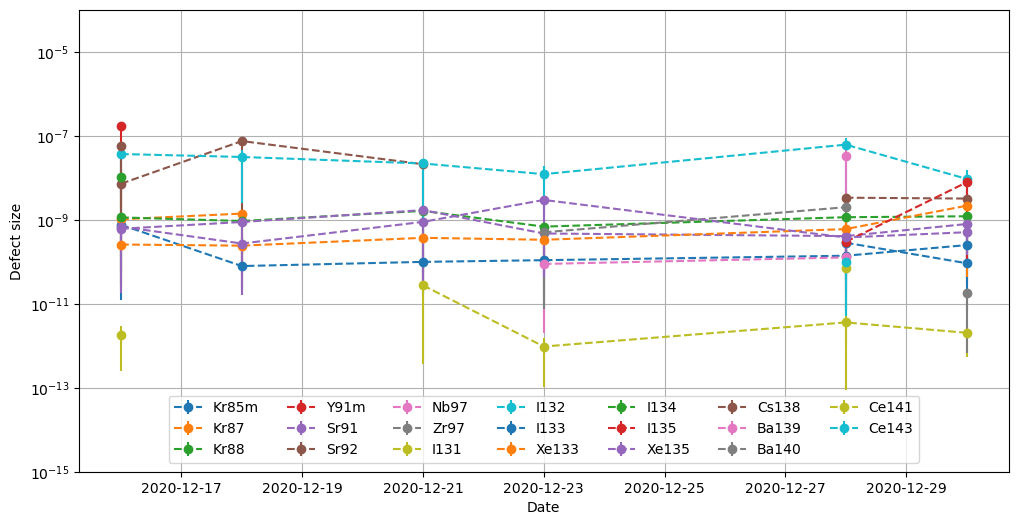

In [56]:


plt.figure(figsize=(12, 6))  # optional, to set a specific size for your plot

defect_sizes.replace(0, np.nan, inplace=True)

for column in defect_sizes.columns:
    yerr_lower = defect_sizes[column] - defect_sizes_lower[column]  # calculate lower error
    yerr_upper = defect_sizes_upper[column] - defect_sizes[column]  # calculate upper error
    yerr = [yerr_lower, yerr_upper]  # combine into a single variable for use in errorbar
    plt.errorbar(defect_sizes.index, defect_sizes[column], yerr=yerr, label=column, ls = '--', fmt='-o')

#plt.title('Defect sizes for each isotope 10 runs')
plt.xlabel('Date')
plt.ylabel('Defect size')
plt.ylim(1e-15, 1e-4)
plt.yscale('log')  # set y-axis to log scale
plt.legend(loc='upper center', ncol = 7, bbox_to_anchor=(0.5, 0.18))  # to include a legend in your plot
plt.grid(True)  # optional, adds a grid to your plot for better visualization
plt.show()


In [55]:
# Generate LaTeX table from DataFrame
latex_table = defect_sizes.to_latex()

# Print the LaTeX table
print(latex_table)

/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_63193/1492771639.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = defect_sizes.to_latex()


\begin{tabular}{lrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &         Kr85m &          Kr87 &          Kr88 &  Y91m &          Sr91 &          Sr92 &          Nb97 &          Zr97 &          I131 &          I132 &          I133 &         Xe133 &          I134 &          I135 &         Xe135 &         Cs138 &         Ba139 &         Ba140 &         Ce141 &         Ce143 \\
Date       &               &               &               &       &               &               &               &               &               &               &               &               &               &               &               &               &               &               &               &               \\
\midrule
2020-12-16 &  7.573260e-10 &  1.025657e-09 &  1.134697e-09 &   NaN &  6.098383e-10 &  7.198022e-09 &           NaN &           NaN &  1.819127e-12 &  3.665544e-08 &           NaN &  2.569751e-10 &  1.024822e-08 &  1.693831e-07 &  6.833409e-10 &  5.769574e-08 &           NaN &           NaN &       

## Find defect size (geometrical mean)

In [58]:
from scipy.stats import gmean

# List of columns that you want to select
Columns_p = ['Sr91', 'Sr92', 'Zr97', 'I131', 'I132', 'I133', 'I134', 'I135', 'Cs138', 'Ba139', 'Ba140', 'Ce141', 'Ce143']

#Columns_p = ['Sr91', 'Sr92', 'Zr97', 'I132', 'I133', 'I134', 'I135', 'Cs138', 'Ba139', 'Ce143']
Columns_p_and_d = ['Sr91', 'Y91m', 'Sr92', 'Nb97', 'Zr97', 'I131', 'I132', 'I133', 'I134', 'I135', 'Cs138', 'Ba139', 'Ba140', 'Ce141', 'Ce143']

defect_sizes.replace(0, np.nan, inplace=True)
defect_sizes_upper.replace(0, np.nan, inplace=True)
defect_sizes_lower.replace(0, np.nan, inplace=True)

# Select these columns
selected_columns_p = defect_sizes.loc[:, Columns_p]
selected_columns_p_upper = defect_sizes_upper.loc[:, Columns_p]
selected_columns_p_lower = defect_sizes_lower.loc[:, Columns_p]

selected_columns_p_and_d = defect_sizes.loc[:, Columns_p_and_d]

# Calculate the geometric average, excluding NaNs
geo_mean_p = gmean(selected_columns_p.stack().dropna())
geo_mean_p_upper = gmean(selected_columns_p_upper.stack().dropna())
geo_mean_p_lower = gmean(selected_columns_p_lower.stack().dropna())


geo_mean_p_and_d = gmean(selected_columns_p_and_d.stack().dropna())
geo_mean_all = gmean(defect_sizes.stack().dropna())

print("The geometric mean of the selected columns is:", geo_mean_p)
print("The geometric mean of the upper bound of selected columns is:", geo_mean_p_upper)
print("The geometric mean of the lower bound of selected columns is:", geo_mean_p_lower)


print("The geometric mean of the selected columns is:", geo_mean_p_and_d)

print("The geometric mean of the selected columns is:", geo_mean_all)

The geometric mean of the selected columns is: 1.098464710078887e-09
The geometric mean of the upper bound of selected columns is: 1.4207175207645342e-09
The geometric mean of the lower bound of selected columns is: 5.878152325634226e-11
The geometric mean of the selected columns is: 9.679596358522526e-10
The geometric mean of the selected columns is: 7.507326926151954e-10
